In [1]:
import tensorflow as tf
print(tf.__version__)
tf.test.is_gpu_available()

2.7.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [2]:
import numpy as np
import pandas as pd
import os
import cv2

from math import ceil
from numba import njit, prange
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array
from pyts.approximation import PiecewiseAggregateApproximation
from keras.utils import np_utils

In [3]:
# npz import 

Welding_data = np.load('E:/Result/ver.3.21/MTF/MTF.npz')

X_data = Welding_data['X_data']
y_data = Welding_data['y_data']
i_data = Welding_data['i_data']

Welding_data.close()

In [4]:
seed = 7
np.random.seed()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X_data, y_data, i_data, test_size= 0.2, shuffle= True, random_state= seed)

In [6]:
inputs = np.concatenate((X_train, X_test))
targets = np.concatenate((y_train, y_test))
index = np.concatenate((i_train, i_test))

In [7]:
print(inputs.shape)
print(targets.shape)
print(index.shape)

(3000, 300, 300, 2)
(3000,)
(3000,)


In [8]:
targets = np_utils.to_categorical(targets)

In [9]:
print(targets.shape)

(3000, 3)


In [10]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits= 10, shuffle= True, random_state= seed)

test= []
train= []
test_= []
train_= []

for train, test in kfold.split(inputs, targets):
    print('-----------------------------')
    print(len(test))
    print(len(train))
    for i in zip(test):
        test_.append(i)
    for i in zip(train):
        train_.append(i)

-----------------------------
300
2700
-----------------------------
300
2700
-----------------------------
300
2700
-----------------------------
300
2700
-----------------------------
300
2700
-----------------------------
300
2700
-----------------------------
300
2700
-----------------------------
300
2700
-----------------------------
300
2700
-----------------------------
300
2700


In [11]:
train= train[0:2700]
train= np.reshape(train, 2700)
test= test_[0:300]
test= np.reshape(test, 300)

In [12]:
print(inputs[train].shape)
print(targets[test].shape)

(2700, 300, 300, 2)
(300, 3)


In [13]:
from keras.models import load_model

with tf.device('/gpu:0'):
    model = load_model('E:/Result/ver.3.21/MTF/weight/MTF_3.h5')
    y_predict = model.predict(inputs[test])
    print(y_predict.shape)
    y_predict_Reshape = np.reshape(y_predict, 900)
    
    list_y_predict_ = []
    
    for j in range(len(y_predict_Reshape)):
        y_predict_Round = round(y_predict_Reshape[j], 0)
        y_predict_int = int(y_predict_Round)
        list_y_predict_.append(y_predict_int)
        
    y_predict = np.array(list_y_predict_)
    print(y_predict.shape)

(300, 3)
(900,)


In [14]:
y_predict = np.reshape(y_predict, (300,3))
y_predict = np.argmax(y_predict, axis= 1)

In [15]:
targets = np.argmax(targets[test], axis= 1)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Acc = accuracy_score(targets, y_predict)
print(Acc)

recall = recall_score(targets, y_predict, average= "macro")
print(recall)

pre = precision_score(targets, y_predict, average= "macro")
print(pre)

f1 = f1_score(targets, y_predict, average= "macro")
print(f1)

0.9866666666666667
0.9859253065774806
0.9868623340321454
0.9863247863247864


In [17]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, Recall, fscore, support = score(targets, y_predict)

print('Precision : {}'.format(precision))
print('Recall : {}'.format(Recall))
print('f_score : {}'.format(fscore))
print('Accuracy : {}'.format(support))

Precision : [1.         0.98888889 0.97169811]
Recall : [1.         0.9673913  0.99038462]
f_score : [1.         0.97802198 0.98095238]
Accuracy : [104  92 104]


In [18]:
X_incorrect= []
X_correct= []
y_incorrect= []
i_incorrect= []
y_correct= []
i_correct= []
y_pre_co= []
y_pre_inco= []

In [19]:
print(inputs[test])

[[[[0.2972973  0.16216215]
   [0.05405406 0.21621622]
   [0.05405406 0.21621622]
   ...
   [0.08108108 0.16216215]
   [0.05405406 0.2972973 ]
   [0.05405406 0.08108108]]

  [[0.1388889  0.13513513]
   [0.3888889  0.27027026]
   [0.3888889  0.27027026]
   ...
   [0.16666667 0.13513513]
   [0.3888889  0.08108108]
   [0.3888889  0.1891892 ]]

  [[0.1388889  0.13513513]
   [0.3888889  0.27027026]
   [0.3888889  0.27027026]
   ...
   [0.16666667 0.13513513]
   [0.3888889  0.08108108]
   [0.3888889  0.1891892 ]]

  ...

  [[0.05128205 0.16216215]
   [0.17948718 0.21621622]
   [0.17948718 0.21621622]
   ...
   [0.41025642 0.16216215]
   [0.17948718 0.2972973 ]
   [0.17948718 0.08108108]]

  [[0.1388889  0.2631579 ]
   [0.3888889  0.15789473]
   [0.3888889  0.15789473]
   ...
   [0.16666667 0.2631579 ]
   [0.3888889  0.15789473]
   [0.3888889  0.07894737]]

  [[0.1388889  0.        ]
   [0.3888889  0.1891892 ]
   [0.3888889  0.1891892 ]
   ...
   [0.16666667 0.        ]
   [0.3888889  0.054054

In [20]:
print(targets)

[2 1 1 2 1 2 0 0 2 0 2 2 1 0 2 0 1 0 0 0 1 2 2 2 1 2 2 0 0 1 1 1 1 1 1 1 0
 1 1 1 0 0 0 2 0 2 0 2 2 0 2 1 0 1 1 1 0 1 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2
 0 0 2 1 0 0 0 2 0 1 1 0 0 2 2 2 2 2 2 1 0 2 1 0 2 1 0 0 1 0 2 2 0 2 2 2 2
 0 2 0 1 1 0 0 1 0 1 2 0 2 1 2 0 2 2 0 0 0 2 0 1 1 2 0 0 0 1 2 1 2 0 0 1 2
 2 1 2 0 2 0 0 2 1 2 2 0 2 1 0 2 1 0 1 0 2 0 0 0 0 1 2 0 0 2 2 0 1 1 0 0 2
 2 0 1 2 0 0 1 1 2 1 1 2 1 0 1 1 1 1 2 0 0 0 1 0 2 1 1 2 2 0 1 1 0 2 1 1 2
 2 2 1 1 0 2 1 2 1 1 0 1 2 2 2 0 2 2 1 1 1 2 1 0 0 0 2 0 0 2 0 0 2 1 0 2 0
 1 1 2 1 0 0 0 0 0 1 1 0 2 0 1 2 0 0 0 2 2 2 2 1 0 2 2 2 1 0 2 0 1 0 0 0 0
 1 2 1 1]


In [21]:
print(index[test])

['H_142' 'P_232' 'P_527' 'H_415' 'P_837' 'H_214' 'N_675' 'N_819' 'H_2'
 'N_519' 'H_73' 'H_921' 'P_117' 'N_994' 'H_112' 'N_356' 'P_184' 'N_105'
 'N_683' 'N_584' 'P_722' 'H_904' 'H_816' 'H_775' 'P_598' 'H_887' 'H_907'
 'N_281' 'N_535' 'P_238' 'P_290' 'P_593' 'P_957' 'P_279' 'P_329' 'P_599'
 'N_593' 'P_138' 'P_965' 'P_14' 'N_407' 'N_758' 'N_452' 'H_207' 'N_393'
 'H_540' 'N_239' 'H_325' 'H_33' 'N_310' 'H_594' 'P_32' 'N_836' 'P_58'
 'P_688' 'P_275' 'N_746' 'P_267' 'P_375' 'H_895' 'H_625' 'H_224' 'H_375'
 'P_541' 'H_235' 'P_124' 'H_119' 'H_181' 'H_464' 'H_111' 'P_863' 'P_772'
 'H_582' 'H_242' 'N_484' 'N_594' 'H_578' 'P_895' 'N_872' 'N_402' 'N_533'
 'H_627' 'N_659' 'P_226' 'P_993' 'N_455' 'N_981' 'H_770' 'H_215' 'H_360'
 'H_645' 'H_543' 'H_924' 'P_303' 'N_50' 'H_901' 'P_231' 'N_583' 'H_780'
 'P_459' 'N_427' 'N_64' 'P_612' 'N_575' 'H_547' 'H_68' 'N_242' 'H_931'
 'H_976' 'H_184' 'H_749' 'N_780' 'H_756' 'N_1' 'P_513' 'P_952' 'N_179'
 'N_387' 'P_203' 'N_839' 'P_830' 'H_302' 'N_548' 'H_403' 'P_457

In [22]:
for i in range(0, len(targets)):
    if y_predict[i] != targets[i]:
        X_incorrect.append(inputs[test][i])
        y_incorrect.append(targets[i])
        i_incorrect.append(index[test][i])
        y_pre_inco.append(y_predict[i])
    else:
        X_correct.append(inputs[test][i])      
        y_correct.append(targets[i])
        i_correct.append(index[test][i])
        y_pre_co.append(y_predict[i])

In [23]:
X_incorrect = np.array(X_incorrect)
X_correct = np.array(X_correct)

In [24]:
print(X_incorrect.shape)
print(y_incorrect)
print(i_incorrect)

(4, 300, 300, 2)
[1, 1, 1, 2]
['P_232', 'P_277', 'P_433', 'H_920']


In [99]:
num = 2

In [100]:
X_inco = X_incorrect[num].reshape(1,300,300,2)

In [101]:
print(i_incorrect[num])

P_433


P_433
1
2


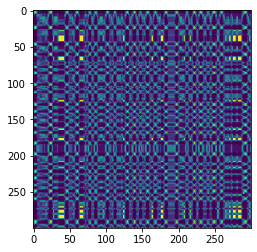

In [102]:
import matplotlib.pyplot as plt

b = X_inco.reshape(300,300,2)
b = b[:,:,0]

print(i_incorrect[num])
print(y_incorrect[num])
print(y_pre_inco[num])

plt.imshow(b)

In [103]:
with tf.device('/gpu:0'):
    get_output = tf.keras.backend.function([model.layers[0].input], 
                                           [model.layers[-3].output, model.layers[-1].output])
    [conv_outputs_inco, predictions_inco] = get_output([X_inco])
    class_weights_inco = model.layers[-1].get_weights()[0]

In [104]:
output_inco = []
for num, idx in enumerate(np.argmax(predictions_inco,axis=1)):
    cam = tf.matmul(np.expand_dims(class_weights_inco[:,idx],axis = 0),
                    np.transpose(np.reshape(conv_outputs_inco[num],(9*9,1024))))
    cam = tf.keras.backend.eval(cam)
    output_inco.append(cam)

In [105]:
output_inco = np.array(output_inco)
output_inco = output_inco.reshape(9,9)
print(output_inco.shape)

(9, 9)


In [106]:
output_inco = cv2.resize(output_inco, (300,300))
img_inco = np.reshape(X_inco, (300,300,2))

large_output_inco = cv2.resize(output_inco, (300*5, 300*5), interpolation=cv2.INTER_CUBIC)
large_img_inco = cv2.resize(img_inco, (300*5, 300*5))

In [107]:
c = large_img_inco[:, :, 0]
print(c.shape)

(1500, 1500)


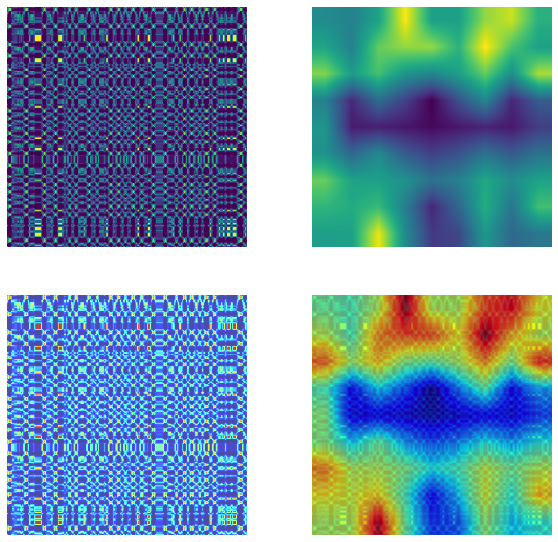

P_232


In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,15))

plt.subplot(3,2,1)
plt.imshow(b)
plt.axis('off')

plt.subplot(3,2,2)
plt.imshow(output_inco)
plt.axis('off')
'''
plt.subplot(3,2,3)
plt.imshow(c)
plt.axis('off')
'''
plt.subplot(3,2,3)
plt.imshow(c, 'jet', alpha=0.7)
plt.axis('off')

plt.subplot(3,2,4)
plt.imshow(c)
plt.imshow(large_output_inco, 'jet' ,alpha=0.7)
plt.axis('off')
plt.show()
